# Probability Distribution

## PETE 2061 Lab 6 Workbook 

## THIS LAB IS DUE BY 10:20 am!!

<a id='top'></a>

<a id='variables'></a>
## Volumetric Reserves Estimation
The Stock-tank Oil Initially In Place (STOIIP) is the amount of oil that is stored in an oil reservoir. Assuming that the pore spaces in the reservoir are filled with water and oil only, the STOIIP can be estimated using the formula:<br><br>
$STOIIP = 7758 Ah\phi(1-S_{wi})/B_{oi}$ <br><br>
where $A$ is the area of the reservoir in acres, <br>
$h$ is the reservoir thickness in feet (ft), <br>
$S_{wi}$ is the initial water saturation of the reservoir. It is the ratio of the volume of water initially in the reservoir to the total pore volume in the reservoir. It can either be expressed as a fraction or percentage. <br>
$B_{oi}$ is the initial oil formation volume factor. It is the ratio of the volume of oil at reservoir conditions (measured in units of reservoir barrels, rb) to the volume of oil at standard conditions (measured in units of stock tank barrels, stb). This means that the unit of $B_{oi}$ is $\frac{rb}{stb}$ <br>
$\phi$ is the porosity of the reservoir. It is the ratio of the pore volume to the bulk volume, and can be expressed as a fraction or in percentage.<br>
7758 is the conversion factor from acre-ft to barrels (bbl or rb) <br><br>

All the variables are assumed to be normally distributed with the mean and standard deviation given using the nomenclaturre (mean, std) below:<br>
A = (mean=300,std=25)  $\hspace{22pt}$ # in acres (store this value in a variable called "area")<br>
h = (60,10) $\hspace{27pt}$ # in feet (store this value in a variable called "h") <br>
$\phi$ = (0.34,0.1) $\hspace{19pt}$ # fraction (store this value in a variable called "poro")<br>
$S_{wi}$ = (0.26,0.05) $\hspace{15pt}$ # fraction (store this value in a variable called "s_wi")<br>
$B_{oi}$ = (1.15,0.07) $\hspace{19pt}$ # rb/stb (store this value in a variable called "b_oi")<br>

1. Using only the mean values given above, write a Python code that calculates and stores the STOIIP value into a variable named "stoiip", and then prints this STOIIP value and unit using a formatted print statement.

In [13]:
area_mean, area_std = 300, 25 #acres
h_mean, h_std = 60, 10 #feet
poro_mean, poro_std = .34, .1 #porosity
s_wi_mean, s_wi_std = .26, .05 #water saturation int
b_oi_mean, b_oi_std = 1.15, .07 #oil formation vol factor
stoiip1 = (7758*area_mean*h_mean*poro_mean*(1-s_wi_mean))/b_oi_mean #in acre/feet
print(stoiip1)

30551678.608695652


2. Import the numpy, pandas and matplotlit.pyplot libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

3. Create a variable named nSamples, and assign it to 10000. <br>
4. Using the given mean and std values, generate "nSamples" of area, h, poro, s_wi and b_oi. These should all be normally-distributed. Use the appropriate function from np.random library<br>
HINT: It is wise to start out by first setting nSamples to 10 and printing out your computations to be sure everything is working as expected. You should then set it to 10000 when you are convinced everything is working as expected.

In [17]:
nSamples = 10000
area = np.random.normal(area_mean,area_std,nSamples)
h = np.random.normal(h_mean,h_std,nSamples)
poro = np.random.normal(poro_mean,poro_std,nSamples)
s_wi = np.random.normal(s_wi_mean,s_wi_std,nSamples)
b_oi = np.random.normal(b_oi_mean,b_oi_std,nSamples)

array([50605577.59518714, 40480383.78662022, 37017618.64967615, ...,
       25229802.09811709, 38321113.94070834, 47661111.70344801])

5. Compute the stoiip values corresponding to the nSamples for all the variables computed in 4 above.<br>
Hint: Note that all the input variables from (4) above are numpy arrays. So, you should vectorize the calculations, by writing just one line of code to compute the STOIIP. <br>
Do not use a for loop. It is slow compared to vectorization.<br>
**For 10 points of extra-credit you can use a for loop and time both approaches, then report the the percentage speed-up, but this should be done only after you have completed all the steps in this lab workbook.**

In [21]:
stoiip = (7758*area*h*poro*(1-s_wi))/b_oi #in acre/feet
#stoiip.size
#stoiip.dtype
#stoiip

array([50605577.59518714, 40480383.78662022, 37017618.64967615, ...,
       25229802.09811709, 38321113.94070834, 47661111.70344801])

6. Store the results in a pandas DataFrame with a column name "STOIIP". Display the first five rows of the stoiip using the .head() function of the pandas DataFrame object.

In [22]:
stoiip_df = pd.DataFrame({'STOIIP':stoiip})
stoiip_df.head()

,STOIIP
0,5.060558e+07
1,4.048038e+07
2,3.701762e+07
3,3.096842e+07
4,5.235345e+07


7. Plot the probability density function (pdf) of these 10,000 values of STOIIP

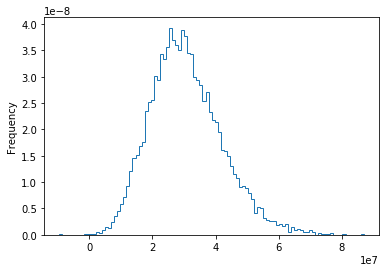

In [26]:
stoiip_df['STOIIP'].plot(kind='hist', histtype='step', bins=100, density=True, cumulative=False)

8. Plot the cumulative distribution function (cdf) of these 10,000 values of STOIIP <br>
9. On this cdf plot, use vertical lines to show the $P_10$, $P_50$, and $P_90$ values of the STOIIP.

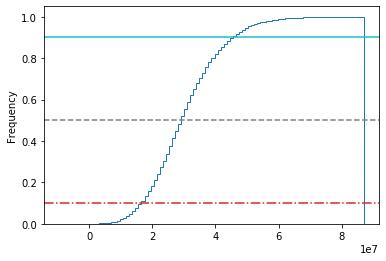

In [48]:
stoiip_df['STOIIP'].plot(kind='hist', histtype='step', bins=100, density=True, cumulative=True)
plt.axhline(.1, c='C3',linestyle='-.')
plt.axhline(.5, c='C7',linestyle='--')
plt.axhline(.9, c='C9',linestyle='-')

10. In one line display the 10th, 50th and 90th percentiles of the STOIIP values. <br>
Hint: use the quantile function, and pass in a list of the percentiles as a fraction 
11. In a new markdown cell, type out what the P10, P50 and P90 estimates of the STOIIP are

In [50]:
stoiip_df.quantile([0.1,0.5,0.9])

,STOIIP
0.1,1.696897e+07
0.5,2.958312e+07
0.9,4.569790e+07


P90 is 16,968,970 (90% likelyhood that this many acre feet are produced)
P50 is 29,583,120 (50% likelyhood that this many acre feet are produced)
P10 is 45,697,900 (10% likelyhood that this many acre feet are produced)